In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import aplpy
from astropy import units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set(font="times",font_scale=1.7,style="ticks")
import matplotlib as mpl
mpl.rc('text', usetex=True)
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
file = pd.read_csv("../files/Cantat2020with_age.tsv",comment="#",sep=";") 
FILE = file.drop([0,1])
float_list = ['RA_ICRS', 'DE_ICRS', 'GLON', 'GLAT', 'r50', 'nbstars07',
              'pmRA*', 'e_pmRA*', 'pmDE', 'e_pmDE', 'plx', 'e_plx', 'Flag', 'AgeNN',
              'AVNN', 'DMNN', 'DistPc', 'X', 'Y', 'Z', 'Rgc', '_RA.icrs', '_DE.icrs']
for col in float_list:
    FILE[col] = pd.to_numeric(FILE[col],errors = 'coerce')
GLON = np.where(FILE.GLON.values<180,FILE.GLON.values,(FILE.GLON.values-360))
FILE = FILE.assign(GLON=GLON)
FILE = FILE.reset_index()

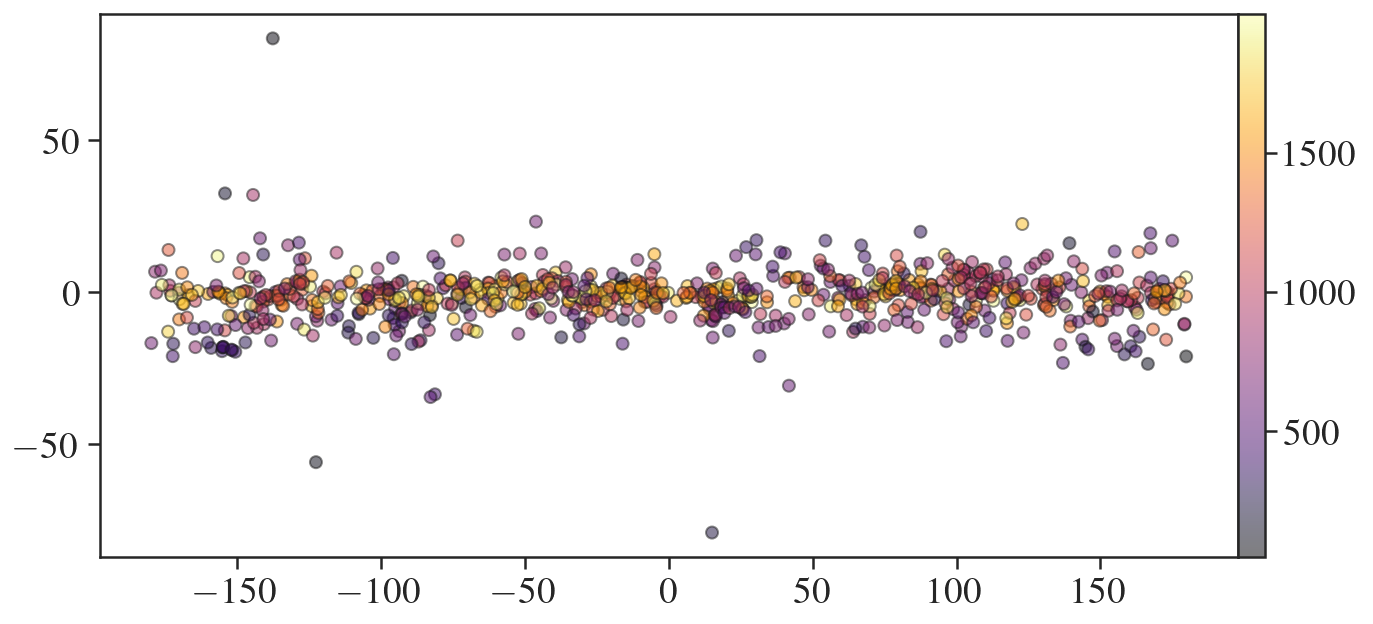

In [3]:
dis_th = 2000 # distance threshold
target = FILE[FILE.DistPc<dis_th]
fig,ax=plt.subplots(figsize=(12,5))
plt.scatter(target.GLON,target.GLAT,c=target.DistPc,cmap="inferno",edgecolors="k",alpha=0.5)
plt.colorbar(pad=0)

In [4]:
target.to_csv("../files/target_2000pc.csv",index=False)

In [5]:
star_catalog = pd.read_csv("../../files/Cantat2020_stars.tsv",sep=";",comment="#",low_memory=False)
sc = star_catalog.drop([0,1])
sc = sc.reset_index()
sc = sc.drop(columns="index")
float_list = ['recno', 'RA_ICRS', 'DE_ICRS', 'GaiaDR2', 'GLON', 'GLAT', 'Plx',
              'e_Plx', 'pmRA*', 'e_pmRA*', 'pmDE', 'e_pmDE', 'RV', 'e_RV', 'o_Gmag',
              'Gmag', 'BP-RP', 'proba','Teff50', '_RA.icrs', '_DE.icrs']
for col in float_list:
    sc[col] = pd.to_numeric(sc[col],errors = 'coerce')
sc["Cluster"] = sc["Cluster"].replace(" ","")
sc.columns

Index(['recno', 'RA_ICRS', 'DE_ICRS', 'GaiaDR2', 'GLON', 'GLAT', 'Plx',
       'e_Plx', 'pmRA*', 'e_pmRA*', 'pmDE', 'e_pmDE', 'RV', 'e_RV', 'o_Gmag',
       'Gmag', 'BP-RP', 'proba', 'Cluster', 'Teff50', '_RA.icrs', '_DE.icrs'],
      dtype='object')

In [6]:
sc.to_csv("../files/star_catalog.csv",index=False)